<a href="https://colab.research.google.com/github/thaistelesr/Modelo_Metodos_Ensemble/blob/main/Modelo_M%C3%A9todos_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Proposta: criar um modelo de machine learning para
identificar os clientes que são menos propensos a pagar a fatura do próximo
mês


Dicionário das informações disponíveis no dataset:
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* AY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

## **0.0 Imports**

In [ ]:
#Importando as bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **0.1 Carregando os dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importando o dataset
df_clientes1 = pd.read_csv('/content/drive/MyDrive/default-of-credit-card-clients.csv')

## **1.0 Descrições**

In [ ]:
#Leitura inicial das informações disponíveis
df_clientes1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## **1.1 Dimensões da base de dados**

In [ ]:
print(f'Há {df_clientes1.shape[0]} linhas e {df_clientes1.shape[1]} colunas na tabela de clientes.')

Há 30000 linhas e 25 colunas na tabela de clientes.


## **1.2 Tipos de dados**

In [ ]:
#Verificando as informações do dataset
df_clientes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## **1.3 Verificando valores nulos**

In [ ]:
#Verificando se o dataset possui valores nulos
df_clientes1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
#Visualizando as colunas do dataset:
df_clientes1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df_clientes1.rename(columns={'default payment next month':'def_pay'}, inplace=True)
df_clientes1.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [ ]:
df_clientes1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

## **1.4 Valores estatísticos iniciais**

In [ ]:
df_clientes1.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.0,8660.0,1.0,7501.0,15000.0,22500.0,30000.0
LIMIT_BAL,30000.0,167484.0,129748.0,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,30000.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0
EDUCATION,30000.0,2.0,1.0,0.0,1.0,2.0,2.0,6.0
MARRIAGE,30000.0,2.0,1.0,0.0,1.0,2.0,2.0,3.0
AGE,30000.0,35.0,9.0,21.0,28.0,34.0,41.0,79.0
PAY_1,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
PAY_2,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
PAY_3,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
PAY_4,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0


##**1.5 Visualização rápida dos dados**

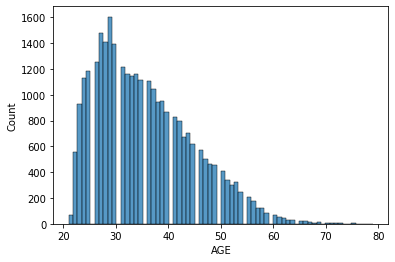

In [ ]:
#Visualizando informações a respeito das idades dos clientes (coluna 'age')
sns.histplot(x='AGE', data=df_clientes1)

In [ ]:
#Verificando qual é a média de idade dos clientes
df_clientes1['AGE'].mean()

35.4855

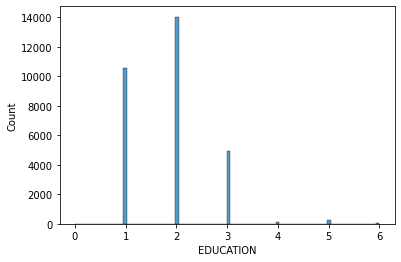

In [ ]:
#Visualizando informações sobre o grau de instrução dos clientes
#Relembrando: EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
sns.histplot(x='EDUCATION', data=df_clientes1)

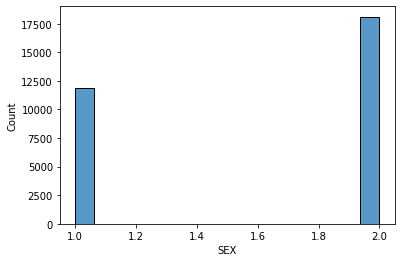

In [ ]:
#Visualizando informações sobre o gênero dos clientes (Gender 1=male, 2=female)
sns.histplot(x='SEX', data=df_clientes1)

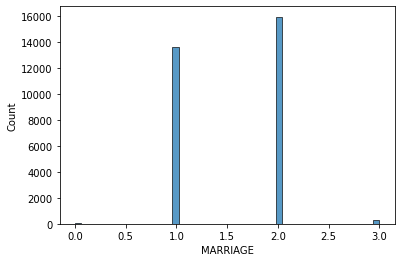

In [ ]:
#Verificando informações sobre o estado civil dos clientes
sns.histplot(x='MARRIAGE', data=df_clientes1)

## **2.0 Exploratory Data Analysis (EDA)**
Iniciando a exploração dos dados para conseguir entender melhor sobre os negócios e tirar alguns insights

 **2.1 Verificando a distribuição de limites e idades separadamente**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


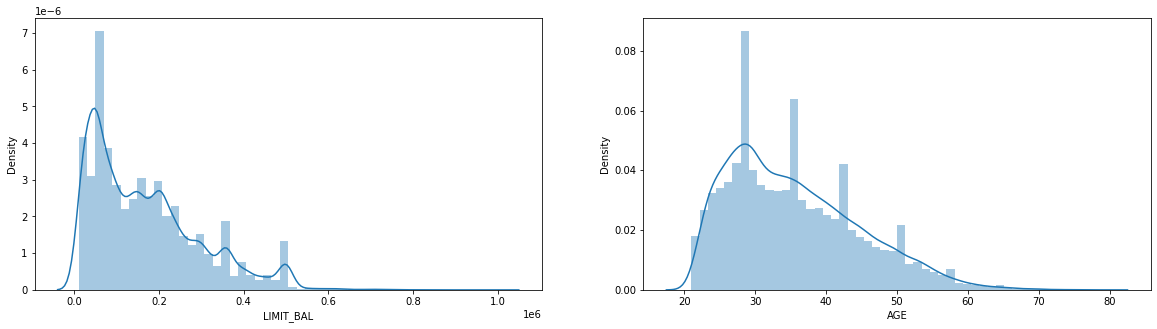

In [ ]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df_clientes1.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df_clientes1.AGE)

plt.show()

Como visto nos gráficos iniciais, é possível perceber que há um maior número de clientes na faixa etária de 20 a 40 anos. Ou seja, pessoas jovens e de meia idade.

**2.2 Verificando a relação entre faixas etárias e o limite oferecido**

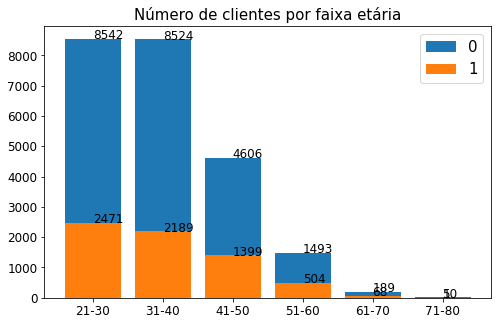

In [ ]:
bins = [20,30,40,50,60,70,80]
faixa_etaria = ['21-30','31-40','41-50','51-60','61-70','71-80']
df_clientes1['AGE_BIN'] = pd.cut(x=df_clientes1.AGE, bins=bins, labels=faixa_etaria, right=True)

age_cnt = df_clientes1.AGE_BIN.value_counts()

age_1 = (df_clientes1.AGE_BIN[df_clientes1['def_pay'] == 1].value_counts())
age_0 = (df_clientes1.AGE_BIN[df_clientes1['def_pay'] == 0].value_counts())
plt.subplots(figsize=(8,5))
#sns.barplot(data=df_clientes1, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(faixa_etaria,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(faixa_etaria,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Número de clientes por faixa etária", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

A faixa etária entre 21 a 30 anos concentra maior parte dos clientes; 31 a 40 anos aparece em seguida. Além disso, é possível perceber que o aumento da faixa etária é um fator que contribui no pagamento.


**2.3 Verificando o estado civil dos clientes**


MARRIAGE: Marital status (1=married, 2=single, 3=others)




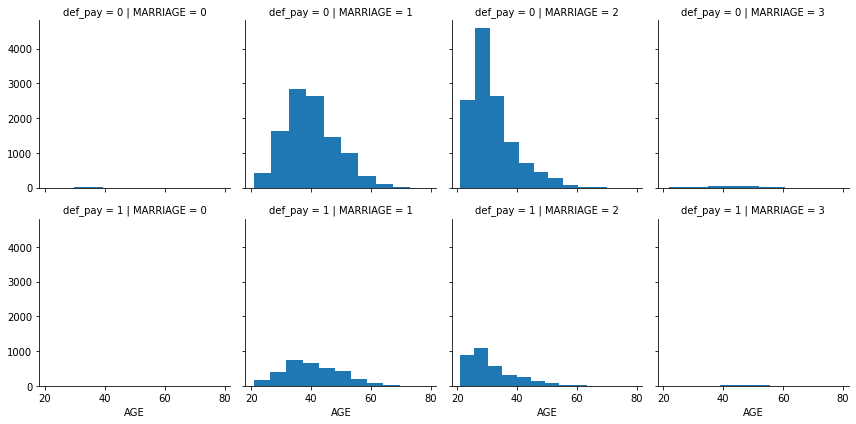

In [ ]:
estado_civil = sns.FacetGrid(df_clientes1, row='def_pay', col='MARRIAGE')
estado_civil = estado_civil.map(plt.hist, 'AGE')
plt.show()

**Insight:** A partir do gráfico acima, podemos inferir que pessoas casadas entre 30 e 50 anos e clientes solteiros de 20 a 30 anos podem ser mais inadinplentes

**2.3 Verificando o quanto a idade e gênero dos clientes pode interferir no pagamento do mês seguinte**

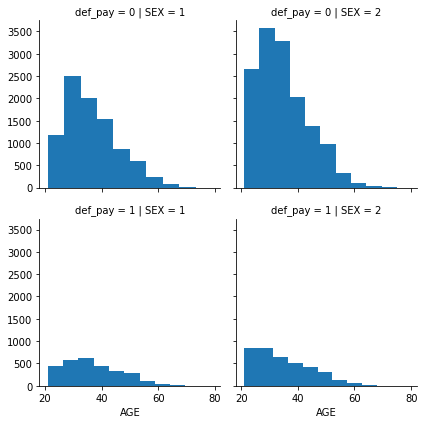

In [ ]:
age_sex = sns.FacetGrid(df_clientes1, row='def_pay', col='SEX')
age_sex = age_sex.map(plt.hist, 'AGE')

**Insight:** Pode-se observar que as mulheres da faixa etária de 20 a 30 anos apresentam uma tendência muito alta de inadimplência em relação aos homens em todas as faixas etárias.

**2.4 Checando se o valor da fatura dos últimos seis meses afetará o padrão de pagamento no próximo mês ou não**



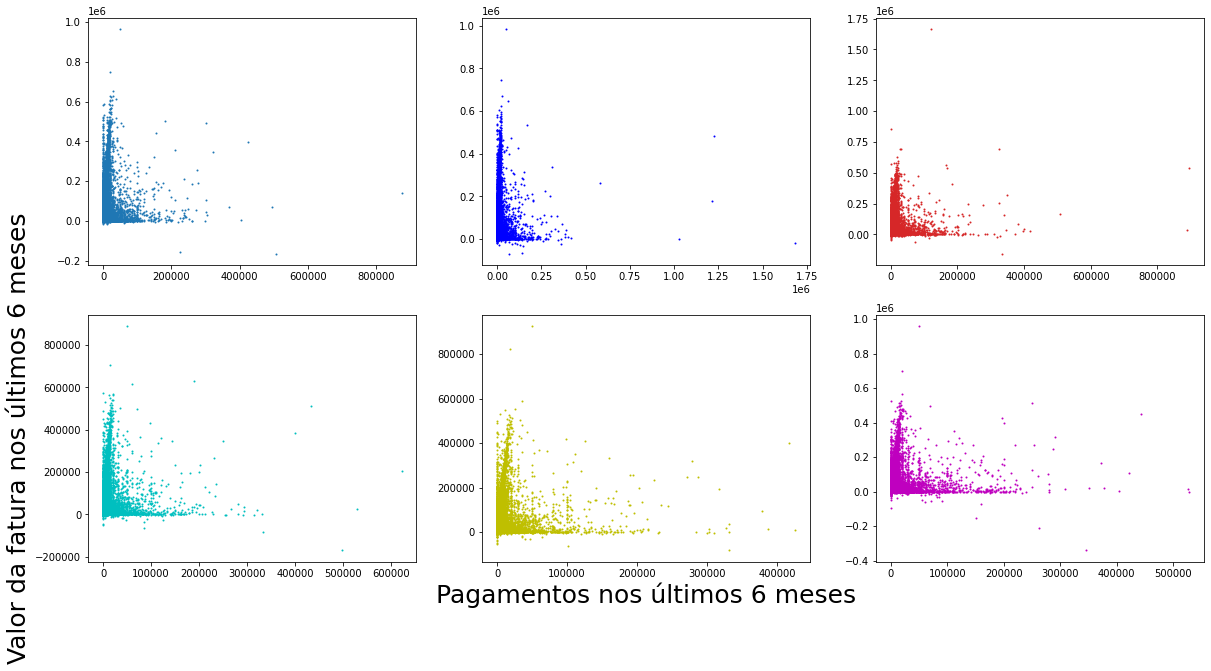

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df_clientes1.PAY_AMT1, y=df_clientes1.BILL_AMT1, c='#1f77b4', s=1)

plt.subplot(232)
plt.scatter(x=df_clientes1.PAY_AMT2, y=df_clientes1.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df_clientes1.PAY_AMT3, y=df_clientes1.BILL_AMT3, c='#d62728', s=1)

plt.subplot(234)
plt.scatter(x=df_clientes1.PAY_AMT4, y=df_clientes1.BILL_AMT4, c='c', s=1)
plt.ylabel("Valor da fatura nos últimos 6 meses", fontsize=25)

plt.subplot(235)
plt.scatter(x=df_clientes1.PAY_AMT5, y=df_clientes1.BILL_AMT5, c='y', s=1)
plt.xlabel("Pagamentos nos últimos 6 meses", fontsize=25)

plt.subplot(236)
plt.scatter(x=df_clientes1.PAY_AMT6, y=df_clientes1.BILL_AMT6, c='m', s=1)

plt.show()

**Insight:** É possível verificar que, nos últimos 6 meses, foram altas as quantidades de valores de faturas enviados, porém, o pagamento dos valores não acompanha a mesma tendência.

2.5 Verificando se o nível escolar dos clientes pode interferir no pagamento do pagamento do próximo mês

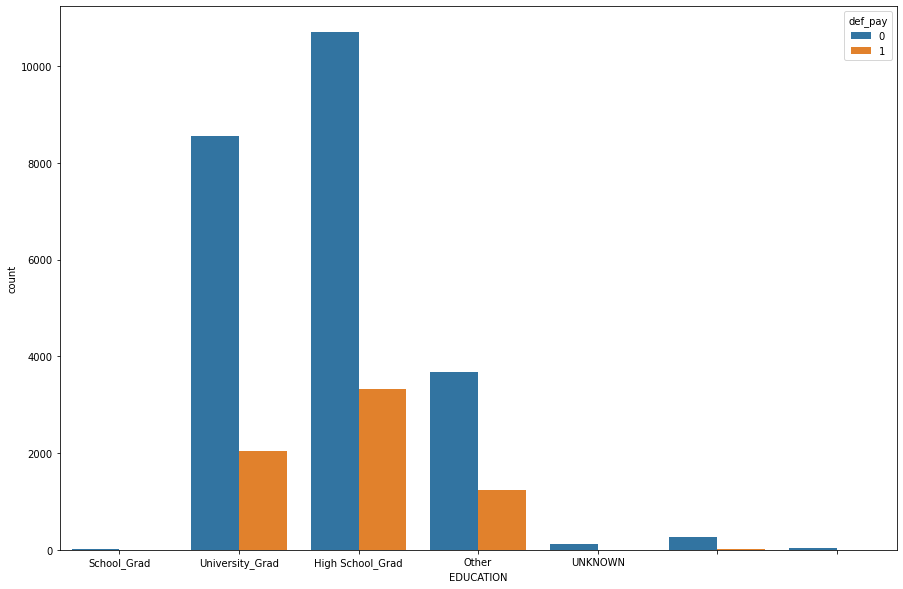

In [ ]:
plt.figure(figsize = (15,10))
edu = sns.countplot(x='EDUCATION', hue='def_pay', data=df_clientes1)
edu.set_xticklabels(['School_Grad','University_Grad','High School_Grad','Other',"UNKNOWN"])
plt.show()

**Insight:** é possível perceber que clientes com maior nível de instrução apresentação menores tendências à inadimplência.

## **3.0 Correlações entre o conjunto de dados**

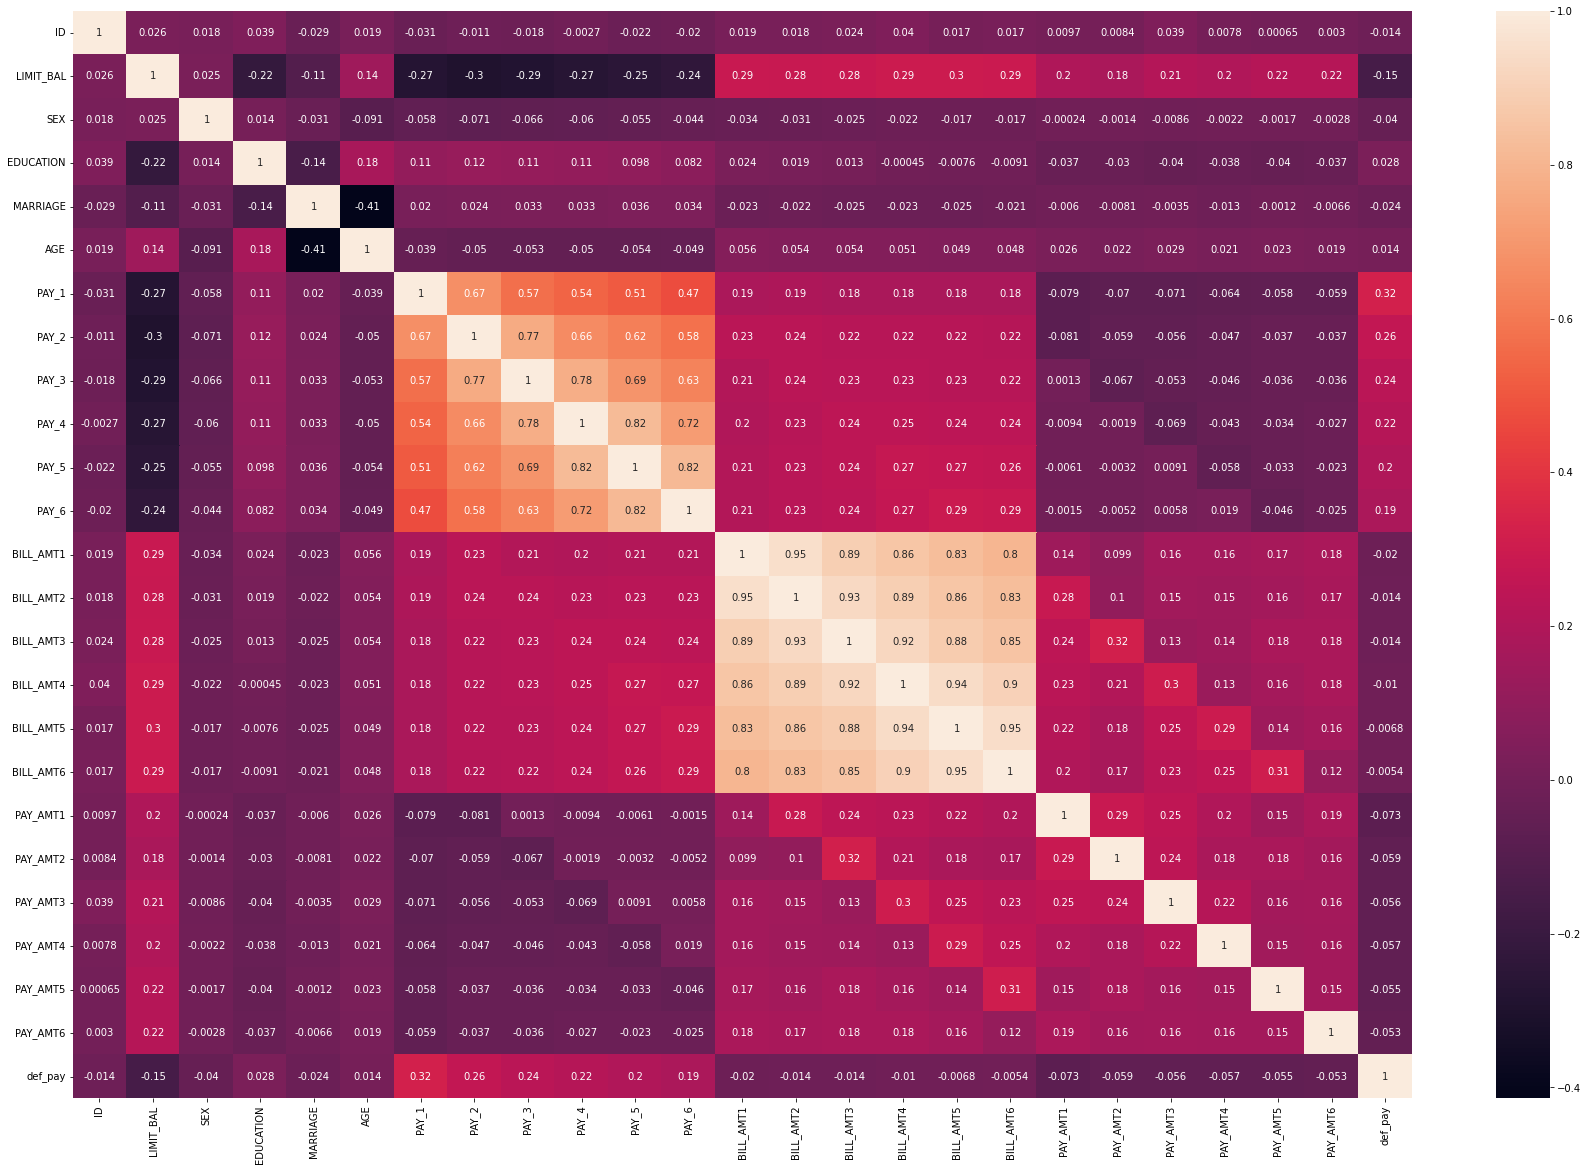

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(df_clientes1.corr(), annot=True)
plt.show()

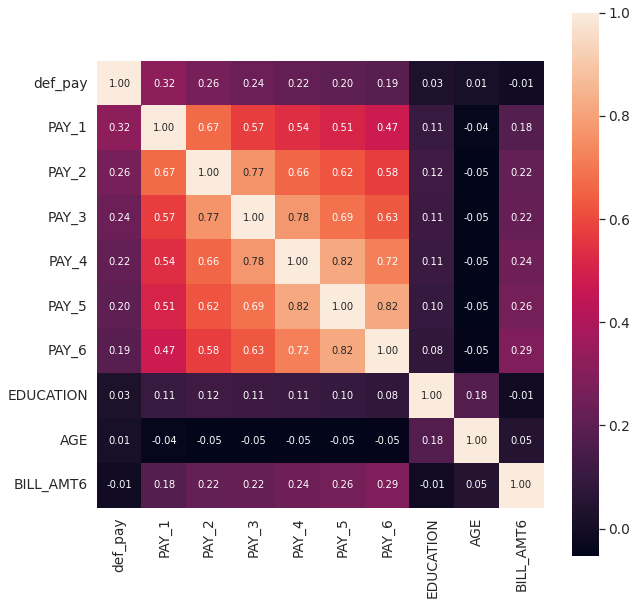

In [ ]:
N = 10 #número de variáveis usadas na matriz
corrmat = df_clientes1.corr()
cols = corrmat.nlargest(N, 'def_pay')['def_pay'].index
cm = np.corrcoef(df_clientes1[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Insight**: De acordo com essa matriz de correlação, é possível perceber que a previsão de pagamento depende do status de reembolso dos últimos seis meses de todos os recursos fornecidos. Porém, existe multicolinearidade entre as features de status de reembolso.

A princípio, usaremos as features para treinar o modelo e, dependendo do primeiro resultado, faremos o refinamento.

# **4.0 Aprendizado de máquina**

## 4.1 Separação do dataset em dados de treino e teste


In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.20

In [ ]:
df_X = df_clientes1.drop(['def_pay','AGE_BIN'], axis=1)
df_y = df_clientes1.def_pay

##4.2 Aplicação do Classificador:
Nesse caso, por ser um modelo Ensemble, será utilizado o ExtraTreesClassifier

In [ ]:
clf = ExtraTreesClassifier(n_estimators = 500, random_state = 99)

##4.3 Instanciando o modelo e verificando a informações iniciais

In [ ]:
#  Divisão de dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

In [ ]:
# Classificador
clf = ExtraTreesClassifier(n_estimators = 500, random_state = 99)

In [ ]:
# Treinamento do Modelo
clf.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500, random_state=99)

In [ ]:
# Score
scores = cross_val_score(clf, X_train, y_train, cv = 3, scoring = 'accuracy', n_jobs = -1)

In [ ]:
# Imprimindo o resultado
print ("ExtraTreesClassifier -> Acurácia em Treino: Média = %0.3f Desvio Padrão = %0.3f" % (np.mean(scores), np.std(scores)))

ExtraTreesClassifier -> Acurácia em Treino: Média = 0.815 Desvio Padrão = 0.002


##4.4 Verificação da Feature Importance do modelo

##4.5 Verificando as previsões

In [ ]:
# Fazendo previsões
y_pred = clf.predict(X_test)

In [ ]:
# Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print (confusionMatrix)

[[4427  256]
 [ 836  481]]


In [ ]:
# Acurácia
print("Acurácia em Teste:", accuracy_score(y_test, y_pred))

Acurácia em Teste: 0.818


##4.6 Otimização dos Hiperparâmetros com Randomized Search

In [ ]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Definição dos parâmetros
param_dist = {"max_depth": [1, 3, 7, 8, 12, None],
              "max_features": [8, 9, 10, 11, 16, 22],
              "min_samples_split": [8, 10, 11, 14, 16, 19],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "bootstrap": [True, False]}

# Para o classificador criado com ExtraTrees, testamos diferentes combinações de parâmetros
rsearch = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = 25, return_train_score = True)

# Aplicando o resultado ao conjunto de dados de treino e obtendo o score
rsearch.fit(X_train, y_train)

# Resultados
rsearch.cv_results_

# Imprimindo o melhor estimador
bestclf = rsearch.best_estimator_
print(bestclf)


ExtraTreesClassifier(bootstrap=True, max_depth=7, max_features=22,
                     min_samples_leaf=6, min_samples_split=19, n_estimators=500,
                     random_state=99)


In [ ]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



0.825


In [ ]:
# Obtendo o grid com todas as combinações de parâmetros
rsearch.cv_results_

{'mean_fit_time': array([ 3.54888144, 13.33140821,  4.77016253,  2.09466429,  8.70885487,
         1.67405133,  7.8878571 ,  5.91785927, 10.5507762 , 11.2845562 ,
         9.31851826,  4.93862076, 13.3499474 ,  7.53902516,  3.59476476,
         7.87406464,  5.54807787,  8.01449223,  6.20317612,  3.08265305,
         7.759374  ,  4.92813067,  8.75323768,  6.15821452,  4.46081419]),
 'mean_score_time': array([0.23323207, 0.36895666, 0.28208823, 0.17171712, 0.42288485,
        0.17339172, 0.31252441, 0.54335313, 0.63383365, 0.31392789,
        0.42871995, 0.21016889, 0.58485012, 0.42524228, 0.20853505,
        0.5633575 , 0.28535562, 0.42206993, 0.31022682, 0.21247153,
        0.28865333, 0.28469744, 0.42137866, 0.30854306, 0.22764902]),
 'mean_test_score': array([0.798     , 0.82020833, 0.81275   , 0.779375  , 0.81979167,
        0.778375  , 0.82083333, 0.81925   , 0.81958333, 0.819625  ,
        0.819625  , 0.81020833, 0.81975   , 0.82020833, 0.80691667,
        0.819375  , 0.8165    , 